## Metapredict per-residue performance
This notebook, when run, offers a means to check the per-residue performance of metapredict on local hardware. This notebook was also used to generate Figure S5 in the metapredict manuscript.

In [65]:
import matplotlib
import random
import time
import numpy as np

# import metapredict!
from metapredict import meta

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

In [63]:
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
def genseq(n):
    """
    Function that generates a random sequence.
    
    Parameters
    -------------
    n : int
        Number of residues in sequence to generate.
        
    Returns
    --------
    str
        Returns a valid amino acid sequence
    """
    return "".join([random.choice(amino_acids) for i in range(n)])



On 100
On 200
On 300
On 400
On 500
On 600
On 700
On 800
On 900
On 1000


In [ ]:
all_times = []
all_errors = []

# range of sequence lengths to check
all_lengths = [100,200,300,400,500,600,700,800,900,1000]

# number of independent sequences to generate
count=30

for l in all_lengths:
    
    print('On %i'%(l))
    local = []
    for i in range(count):
        s = genseq(l)
        start = time.time()
        meta.predict_disorder(s)
        end = time.time()
        local.append(l/(end-start))
        
        
    all_times.append(np.mean(local))
    all_errors.append(np.std(local)/np.sqrt(count))

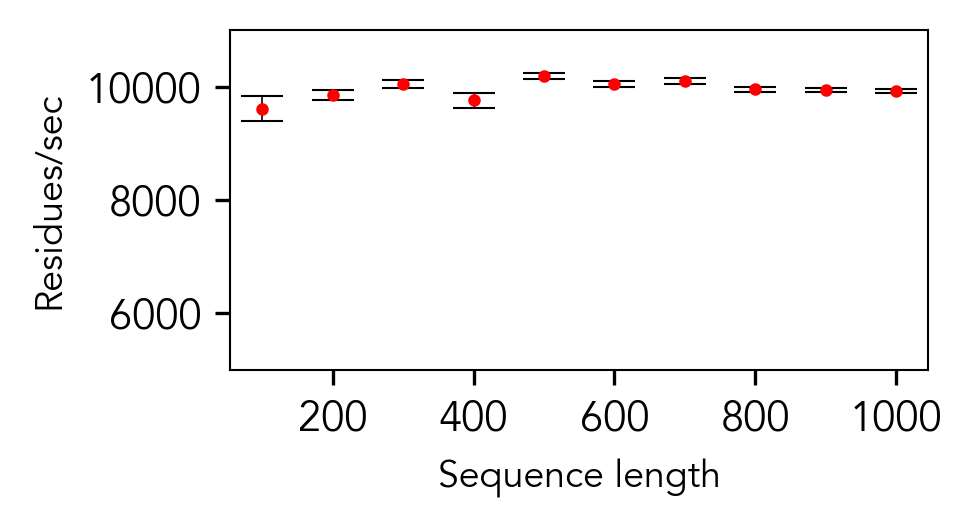

In [64]:
figure(num=None, figsize=(3, 1.5), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()


plt.errorbar(all_lengths, all_times, yerr=all_errors,color='k', linewidth=0.4, linestyle=' ', capsize=5, capthick=0.5)
plt.plot(all_lengths, all_times, 'o',color='r',ms=2)
plt.ylim([5000,11000])
plt.ylabel('Residues/sec',fontsize=9)
plt.xlabel('Sequence length',fontsize=9)

plt.savefig('res_per_seqlen.pdf')
